In [1]:
import copy
from itertools import tee

def pairwise(iterable):
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)



In [12]:
edges = {'in0mid1': ['in0', 'mid1', -3.2813062719365176],
         'in1mid1': ['in1', 'mid1', 3.9387150923241263],
         'in2out2': ['in2', 'out2', -1.7019380436441325],
         'mid1out1': ['mid1', 'out1', -3.451121623683809],
         'in1out0': ['in1', 'out0', 1.841110941553487],
         'mid0out0': ['mid0', 'out0', -0.28884480390660766],
         'mid0mid2': ['mid0', 'mid2', 2.1289790935449413],
         'mid0mid0': ['mid0', 'mid0', -3.204883259575767],
         'in2mid0': ['in2', 'mid0', -3.0564321684724556],
         'in0out0': ['in0', 'out0', -1.3365481458873798],
         'mid1mid0': ['mid1', 'mid0', -1.8015565389897756],
         'mid2mid1': ['mid2', 'mid1', -2.2041812910117504],
         'mid2out1': ['mid2', 'out1', -0.2574698611323058],
         'in2mid1': ['in2', 'mid1', 2.4166030825576073]}

# edges = [('in2', 'out2',1),
#          ('in1', 'mid2',2),
#          ('mid2','mid0',2.1),
#          ('mid0','mid2',2.2),
#          ('mid0','mid1',3),
#          ('mid1','mid0',4), 
#          ('mid1','mid1',5),
#          ('mid1','out1',6),
#          ('mid1','out0',7),
#          ('in0','out0',8),
#         ('mid2','mid1',9),
#         ('mid1','mid2',10),
#         ('in3','mid2', 11)]

In [22]:
edges_no_key = [edges[i] for i in edges]
edges_no_weight = [i[:-1] for i in edges_no_key]

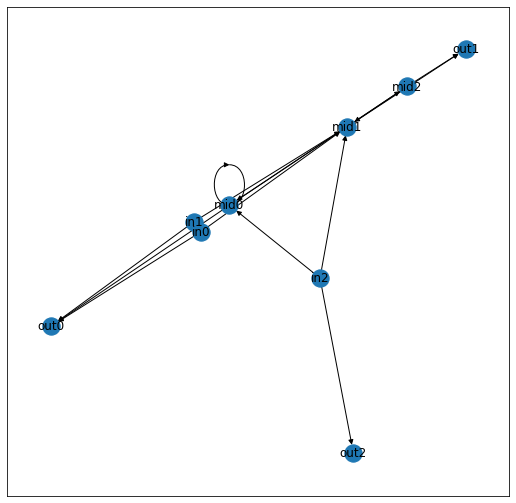

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.MultiDiGraph()
G.add_edges_from(edges_no_key)
  
plt.figure(figsize =(9, 9))
nx.draw_networkx(G)

In [48]:
out = list(set([i[1] for i in edges_no_key if 'out' in i[1]]))
init = list(set([i[0] for i in edges_no_key if 'in' in i[0]]))

dic = {}
for out in out:
    dic[out] = []
    for inp in init:
        for i in nx.all_simple_paths(G, inp, out):
            
            dic[out].append(i)

lis = []
for item in dic['out0']:
    lis += [i for i in pairwise(item)]
lis = list(set(lis))  

list_plus_weight = []
for li in lis:
    for it_nr, it in enumerate(edges_no_weight):
        if li == tuple(it):
            list_plus_weight.append(tuple(edges_no_key[it_nr]))

In [49]:
list_plus_weight

[('in0', 'out0', -1.3365481458873798),
 ('in2', 'mid1', 2.4166030825576073),
 ('in0', 'mid1', -3.2813062719365176),
 ('in1', 'out0', 1.841110941553487),
 ('mid1', 'mid0', -1.8015565389897756),
 ('mid0', 'out0', -0.28884480390660766),
 ('in1', 'mid1', 3.9387150923241263),
 ('in2', 'mid0', -3.0564321684724556)]

input

In [39]:
dic = {}
for i in list_plus_weight:
    if 'in' in i[0] and 'mid' in i[1]:
        if i[1] in dic:
            dic[i[1]] += [i[2]]
        else:
            dic[i[1]] = [i[2]]

In [40]:
dic

{'mid1': [2.4166030825576073, -3.2813062719365176, 3.9387150923241263],
 'mid0': [-3.0564321684724556]}